# Contamination example 1a
## No contamination and uninformative priors on orbital parameters

*[Hannu Parviainen](mailto:hannu@iac.es)<br>
Instituto de Astrofísica de Canarias*

Last modified: 15.7.2019

Here we use the `pytransit.contamination` module to estimate the *true planet to star radius ratio* robustly using multicolour photometry in the presence of possible flux contamination from an unresolved source in the photometry aperture, as detailed in Parviainen et al. 2019 (submitted). This can be used in the validation of transiting planet candidates, where, e.g., blended eclipsing binaries are a significant source of false positives.

**Light curves:** We don't use real data here, but create simulated multicolour photometry lightcurves using the `MockLC` class found in `src.mocklc`. The code is the same that was used for the simulations in Parviainen et al. (2019).

**Log posterior function:** The log posterior function is defined by `MockLPF` class found in `src.blendlpf.MockLPF`. The class inherits `pytransit.lpf.PhysContLPF` and overrides the `_init_instrument` method to define the instrument and the contamination model (amongst other things to make running a variety of simulations smooth).

**Parametrisation:** As discussed in the paper, the contamination is parametrised by the *apparent area ratio* ($k_\mathrm{True}^2$), *true area ratio* ($k_\mathrm{App}^2$), and the effective temperatures of the host and contaminant stars. The *apparent area ratio* defines how deep the transit is in a single single passband and can be wavelength dependent (if the host and contaminant are of different spectral type), while the *true area ratio* stands for the unblended true geometric planet-star area ratio.

The *true radius ratio* ($k_\mathrm{True}$) is the main quantity of interest in transiting planet candidate validation), since it together with a stellar radius estimate gives the true absolute planetary radius. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
from corner import corner
sys.path.append('.')

In [3]:
from src.mocklc import MockLC, SimulationSetup
from src.blendlpf import MockLPF
import src.plotting as pl 

## Create a mock light curve

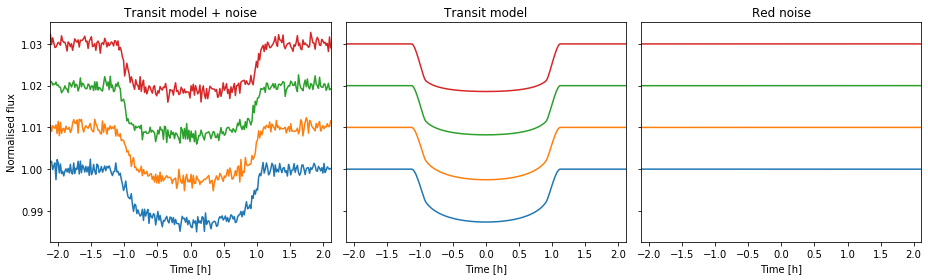

In [4]:
lc = MockLC(SimulationSetup('M', 0.1, 0.0, 0.0, 'short_transit', cteff=5500))
lc.create(wnsigma=[0.001, 0.001, 0.001, 0.001], rnsigma=0.00001, rntscale=0.5, nights=1);
lc.plot();

## Initialize the log posterior function

In [5]:
lpf = MockLPF('Example_1', lc)

In [41]:
lpf.print_parameters(columns=2)

  0 |G| tc         [-inf ..  inf]	  1 |G| pr         [0.00 ..  inf]
  2 |G| rho        [0.00 ..  inf]	  3 |G| b          [0.00 .. 1.00]
  4 |P| k2_app     [0.00 .. 0.06]	  5 |G| k2_true    [0.00 ..  inf]
  6 |G| teff_h     [2500.00 .. 12000.00]	  7 |G| teff_c     [2500.00 .. 12000.00]
  8 |P| q1_0       [0.00 .. 1.00]	  9 |P| q2_0       [0.00 .. 1.00]
 10 |P| q1_1       [0.00 .. 1.00]	 11 |P| q2_1       [0.00 .. 1.00]
 12 |P| q1_2       [0.00 .. 1.00]	 13 |P| q2_2       [0.00 .. 1.00]
 14 |P| q1_3       [0.00 .. 1.00]	 15 |P| q2_3       [0.00 .. 1.00]
 16 |L| loge_0     [-4.00 .. 0.00]	 17 |L| loge_1     [-4.00 .. 0.00]
 18 |L| loge_2     [-4.00 .. 0.00]	 19 |L| loge_3     [-4.00 .. 0.00]


## Optimize

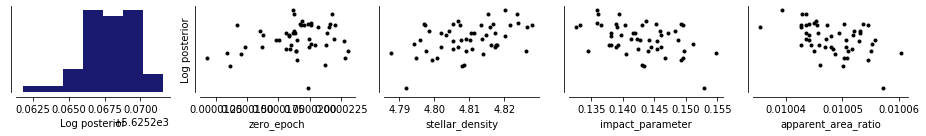

In [6]:
lpf.optimize_global(1000)

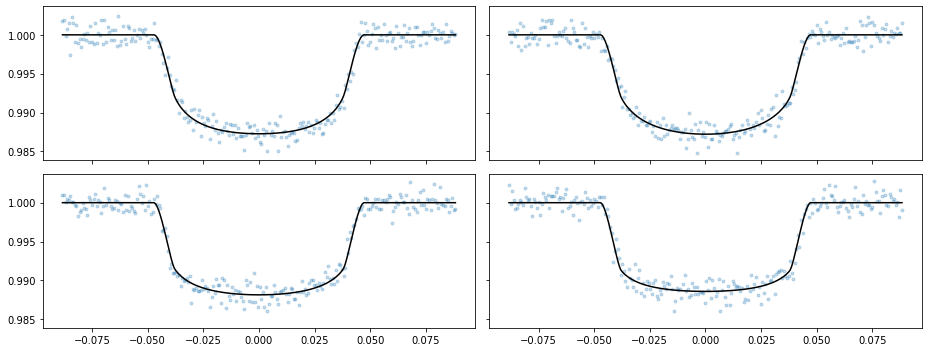

In [7]:
lpf.plot_light_curves()

## Estimate the posterior

The contamination parameter space is a bit difficult to sample (especially if the signal to noise ratio is low), so the sampling should be continued at least for 10000 iterations.

In [42]:
lpf.sample_mcmc(5000, reset=True, repeats=2)

## Analysis

We plot the main results below. It is clear that a single good-quality four-colour light curve still allows for contamination from a source of similar spectral type as the host star. However, in this example, the maximum allowed level of contamination is not sufficient to take the transiting object out of the planetary regime.

Also, the joint posterior plots clearly show that any significant contamination must come from a source of a similar spectral type as the host. Combining this information with prior knowledge about the probability of having such a system without colour variations can be used in probabilistic planet candidate validation.

### Plot the basic joint posterior

In [43]:
df = lpf.posterior_samples()

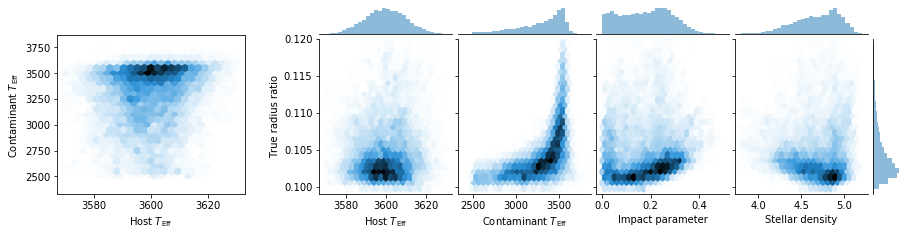

In [44]:
pl.joint_radius_ratio_plot(df, fw=13, clim=(0.099, 0.12), htelim=(3570, 3630), ctelim=(2400,3800), blim=(0, 0.5), rlim=(3.8, 5.2));

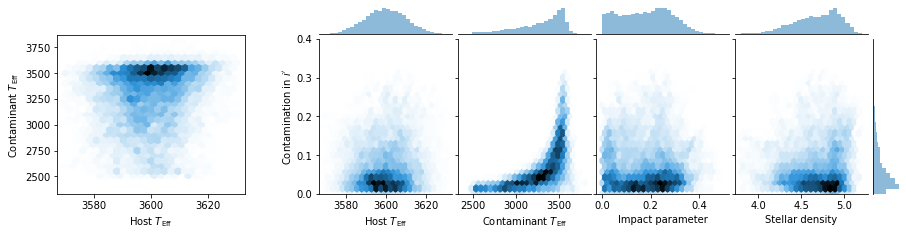

In [45]:
pl.joint_contamination_plot(df, fw=13, clim=(0, 0.4), htelim=(3570, 3630), ctelim=(2400,3800), blim=(0, 0.5), rlim=(3.8, 5.2));

### Plot the apparent and true radius ratio posteriors

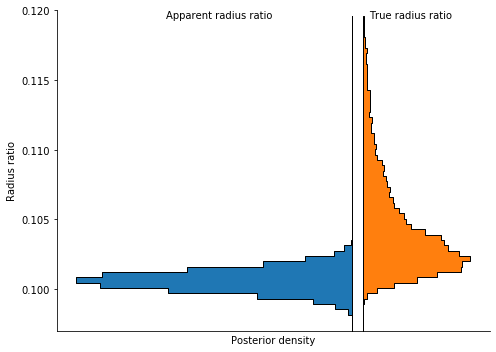

In [46]:
pl.marginal_radius_ratio_plot(df, bins=60, klim=(0.097, 0.12), figsize=(7,5));

### Make a corner plot to have a good overview to the posterior space

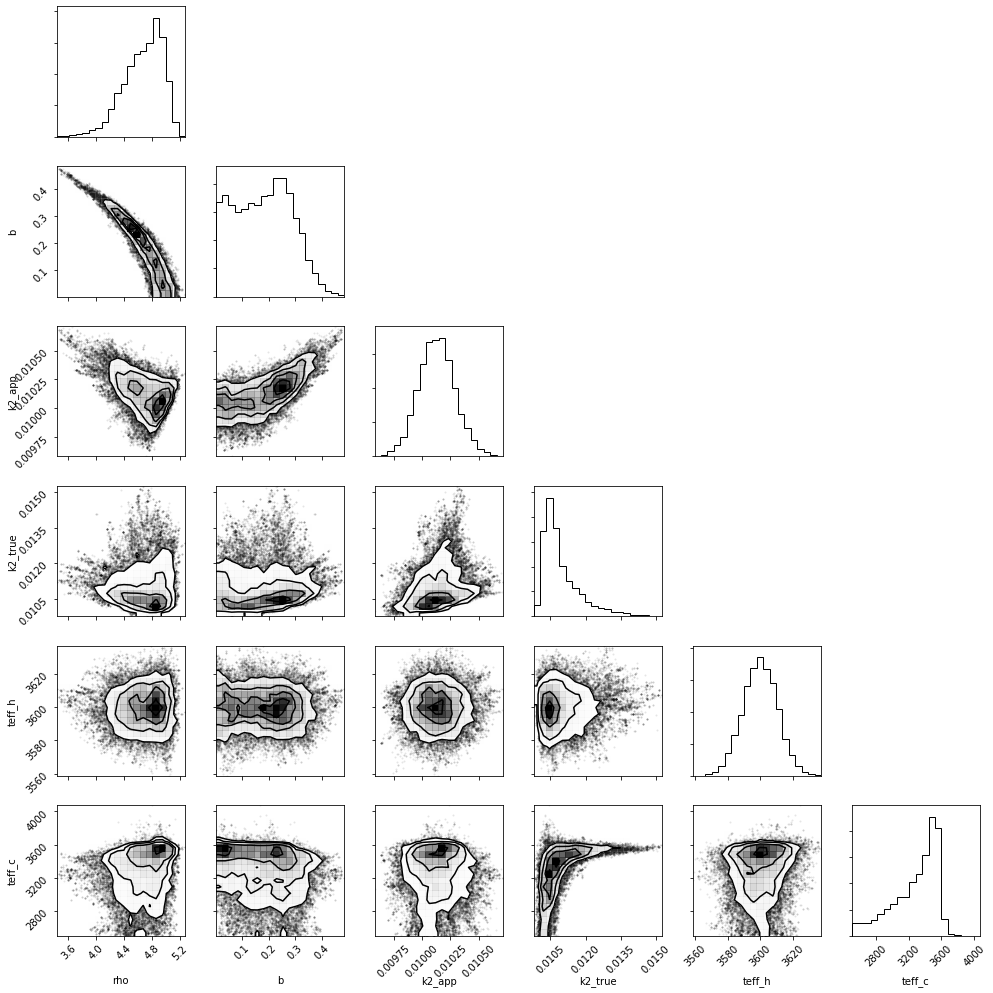

In [48]:
corner(df.iloc[:,2:-3]);

---
<center>&copy; 2019 Hannu Parviainen</center>